# ** NN & NNLP**

## **Skip-gram Model for Word2Vec**

<br>



There are two Word2Vec architectures for creating word embeddings: the Continuous Bag of Words (CBOW) architecture and the Skip Gram architecture . In this lab, we will obtain our own word embeddings by training a skip-gram neural network model. Some of the code for this will be supplied here but in some sections, you will be required to implement the code yourself. Hints and
tips will be provided.


The skip gram model is essentially a feedforward neural network with one hidden layer, trained to predict the context word given a target word. There are two ways to train this model: (1) using a hierarchical softmax function and/or (2) by negative sampling. In this lab, we will be training using
negative sampling. To train with negative sampling, the model is cast as a binary classification problem. The dataset would consist of positive and negative examples of the form:

Input | label
--| --
(target_word, word_in_its_context)       |  1
(target_word, word_not_in_its_context)   |  0

created from the sentences in a corpus. The exact number of positive and negative examples will depend on the window size, and the balance ratio of positive:negative examples.  

As an example, consider the sentence: “ **The quick brown
fox jumped over the lazy dog** ”. For the target word ' **fox** ' and a window size of 2, all the positive and negative examples drawn from this sentence would be:

Input | label
--| --
(fox, the) | 0
(fox, quick) | 1
(fox, brown) | 1
(fox, jumped) | 1
(fox, over) |1
(fox, lazy) | 0
(fox, dog) | 0

The model is trained to learn to predict 1 when a word is in the context of the target word (i.e.in the window of the target word) and 0 otherwise. The model thus learns the statistics of the given corpus: the frequency with two words appear together would determine how similar they are (similarity is usually measured using cosine distance). After training, the trained hidden layer weights are the word embeddings.



### **0. Prepare the environment**

Open Google Colab or activate the virtual environment you’ve created

### **1. Downloading the Corpus**

Our training data will be comprised of 3 documents from the Gutenberg corpus. We can find this and other corpora in nltk https://www.nltk.org/book/ch02.html

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('gutenberg')
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
from nltk.corpus import gutenberg
austen = gutenberg.sents('austen-sense.txt') + gutenberg.sents('austen-emma.txt') + gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


**Sanity check:**

This training corpus contains 16498 sentences. The following print statement should return 16498.

In [ ]:
print(len(austen))

16498


In [ ]:
austen[0]

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']']

### **2. Preprocessing the Training Corpus**

In this section, you will write code to remove special characters, empty strings, digits and
stopwords from the sentences and put all the words into lower cases. You might also consider removing sentences with fewer than 3 words or at least empty sentences.


**Hints:**
*   The corpus can be accessed as you would a tokenized list, a list of lists, each inner list contains all the tokens in the sentence. Eg:
\>> austen[0] =['[', 'Sense', 'and', 'Sensibility', 'by','Jane', 'Austen', '1811', ']']

*   the python <string> library contains a variable “punctuation”, a string containing all
the special characters.

*   You might want to write a function that takes the corpus as an argument and returns the preprocessed corpus as a list of lists.

 Alternatively, you can use the keras preprocessing library to preprocess the text. More information on the library can be found here:
https://keras.io/preprocessing/text/


**Sanity check:**

After preprocessing the corpus, as a sanity check, print the following line of code. If you chose removed sentences of length with fewer than 3 words, it should be about 13651.

As a test for your preprocessing function, preprocess the sample below and print the output of your function.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re



tokenizer = nltk.RegexpTokenizer(r"\w+") # to tokenize just words not punctuation
lemmatizer = WordNetLemmatizer() # WordNet lemmatizer for lemmatization
stemmer = PorterStemmer() # Porter stemmer for stemming
stoplist = set(stopwords.words('english') + list(punctuation))

def preprocess_corpus(corpus):


    preprocessed = []

    for case in corpus:
        case = [sentence for sentence in case if sentence != ""]
        case = " ".join(case)

        # Remove URLs, email addresses, and any other special characters
        case = re.sub(r"http\S+", "", case)
        case = re.sub(r"\S+@\S+", "", case)
        case = re.sub(r"[^A-Za-z0-9\s]+", "", case)

        case = re.sub(r'\d+', '', case)
        case = case.lower()
        words = tokenizer.tokenize(case)
        words = [word for word in words if word not in stoplist and len(word) > 2]

        words = [lemmatizer.lemmatize(word) for word in words]


        if len(words) > 2:
            preprocessed.append(words)

    return preprocessed



normalized_corpus = preprocess_corpus(austen)
print('The new length of the preprocessed output : ' , len(normalized_corpus))

The new length of the preprocessed output :  13843


In [ ]:
sample = austen[:2] + austen[100:102]
preprocessed_sample = preprocess_corpus(sample)


print(len(sample), sample)
print()
print(len(preprocessed_sample), preprocessed_sample)

4 [['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'], ['CHAPTER', '1'], ['But', ',', 'then', ',', 'if', 'Mrs', '.', 'Dashwood', 'should', 'live', 'fifteen', 'years', 'we', 'shall', 'be', 'completely', 'taken', 'in', '."'], ['"', 'Fifteen', 'years', '!']]

2 [['sense', 'sensibility', 'jane', 'austen'], ['mr', 'dashwood', 'live', 'fifteen', 'year', 'shall', 'completely', 'taken']]


### **3. Creating the Corpus Vocabulary and Preparing the Data**


To prepare the data for machine learning, you will write code to prepare 3 variables:

1. \<word2idx>: a lookup table, a dictionary of (word : word index) pairs where **word index** is a unique integer assigned to every **unique word** in the corpus.
2. \<idx2word>: a dictionary of (token index: token ), a reversal of \<word2idx>.
3. \<sents_as_ids>: The input to the model cannot be text, rather, each word needs to be represented by a unique integer and each sentence an array of integers.


The incomplete code provided below is just a guide.

In [ ]:

def prepareData(normalized_corpus):
    word2idx = {}
    idx = 0
    for sent in normalized_corpus:
        for word in sent:
            if word not in word2idx.values():
                word2idx[idx] = word
                idx+=1


    return word2idx

word2idx = {value : key for (key, value) in prepareData(normalized_corpus).items()}
idx2word = prepareData(normalized_corpus)

def prepareSentsAsId(normalized_corpus,word2idx):
    '''
    '''
    sents_as_ids=[]
    for sent in normalized_corpus:
        sent_id=[]
        for word in sent:
            sent_id.append(word2idx[word])
        sents_as_ids.append(sent_id)
    return sents_as_ids


**Sanity Check**

Copy and run the following lines of code:

```
print('Number of unique words:', len(word2idx)**
```
Returns a number between 9800 and 1200, the exact number depends on your preprocessing step.

```
print('\nSample word2idx: ', list(word2idx.items())[:10])
```

Sample word2idx:  [('sense', 0), ('sensibility', 1), ('jane', 2), ('austen', 3), ('the', 4), ('family', 5), ('dashwood', 6), ('long', 7), ('settled', 8), ('sussex', 9)]


```
print('\nSample idx2word:', list(idx2word.items())[:10])**
```

Sample idx2word: [(1, 'could'), (2, 'would'), (3, 'mr'), (4, 'mrs'), (5, 'must'), (6, 'said'), (7, 'one'), (8, 'much'), (9, 'miss'), (10, 'every')]

```
print('\nSample sents_as_id:', prepareSentsAsId(preprocessed_sample))
```

Sample sents_as_id: [[0, 1, 2, 3], [41, 72, 6, 201, 619, 35, 620, 296, 621]]



After you have created the three variables, set the <vocab_size> and <embed_size> variables with the following commands:

In [ ]:
print('Number of unique words:', len(word2idx))
print('\nSample word2idx: ', list(word2idx.items())[:10])
print('\nSample idx2word:', list(idx2word.items())[:10])
print('\nSample sents_as_id:', prepareSentsAsId(preprocessed_sample,word2idx))

Number of unique words: 8965

Sample word2idx:  [('sense', 0), ('sensibility', 1), ('jane', 2), ('austen', 3), ('family', 4), ('dashwood', 5), ('long', 6), ('settled', 7), ('sussex', 8), ('estate', 9)]

Sample idx2word: [(0, 'sense'), (1, 'sensibility'), (2, 'jane'), (3, 'austen'), (4, 'family'), (5, 'dashwood'), (6, 'long'), (7, 'settled'), (8, 'sussex'), (9, 'estate')]

Sample sents_as_id: [[0, 1, 2, 3], [67, 5, 190, 575, 33, 576, 279, 577]]


In [ ]:
VOCAB_SIZE = len(word2idx)
EMBED_SIZE = 100 # We are creating 100D embeddings.

In [ ]:
print('Number of unique words:', len(word2idx))

Number of unique words: 8965


### **4. Generating training instances**


In this section we would generate the training examples of the format shown in introduction using the keras skip-gram generator https://keras.io/preprocessing/sequence/

In [ ]:
from keras.preprocessing.sequence import skipgrams


# your code for generating training examples goes here
# Create an empty list to store skipgrams
skip_grams = []

# Convert the preprocessed sample to a list of IDs using the word2idx dictionary
id_sent = prepareSentsAsId(preprocessed_sample, word2idx)

# Generate skipgrams for each sentence in the sample
# VOCAB_SIZE is the size of the vocabulary, window_size is the size of the window to consider,
# and negative_samples is the number of negative samples to generate for each positive sample
# (set to 1.0 to generate the default number of negative samples)
for i in id_sent:
    skip_grams.append(skipgrams(i, VOCAB_SIZE, window_size=4, negative_samples=1.0, shuffle=True,
                                categorical=False, sampling_table=None, seed=None))


**Sanity Check:**

To view the skip_grams for the first sentence in the training data, run the line of code that follows. The output should look like:

(austen (3), sensibility (1)) -> 1

(austen (3), jane (2)) -> 1

(jane (2), sensibility (1)) -> 1

(jane (2), walked (2639)) -> 0

(jane (2), partridge (7948)) -> 0

(sensibility (1), austen (3)) -> 1

(sensibility (1), beneficial (5587)) -> 0

(sensibility (1), jane (2)) -> 1

(sensibility (1), dreamt (8308)) -> 0

(austen (3), perception (6543)) -> 0

(jane (2), austen (3)) -> 1

(austen (3), imposing (8622)) -> 0


In [ ]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for i in range(len(pairs)):
         	print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        	# the first word and its index
        	idx2word[pairs[i][0]], pairs[i][0],
        	# the second word and its index
        	idx2word[pairs[i][1]], pairs[i][1],
        	# the label
        	labels[i]))


(austen (3), sensibility (1)) -> 1
(sensibility (1), austen (3)) -> 1
(austen (3), jane (2)) -> 1
(jane (2), roused (1591)) -> 0
(jane (2), history (2207)) -> 0
(austen (3), unshaken (3478)) -> 0
(jane (2), austen (3)) -> 1
(sensibility (1), gipsy (7335)) -> 0
(sensibility (1), obligingly (3919)) -> 0
(austen (3), disinherited (5496)) -> 0
(jane (2), sensibility (1)) -> 1
(sensibility (1), jane (2)) -> 1


### **5. Building the Skip-gram Neural Network Architecture**

In this section we would be building the skip-gram neural network architecture using the Keras Functional API and the Sequential model introduced in the previous lab. https://keras.io/getting-started/functional-api-guide/

In [ ]:
from keras.layers import Dot, Embedding, Input
from keras.layers.core import Dense, Reshape
from keras.models import Model
from keras.utils.vis_utils import plot_model

The skip-gram model is two input one output feedforward neural network with one hidden layer and this will be built over a series of steps.

####**A. The first step is to initialize and transform the first input using the following lines of code:**

In [ ]:
# The input is an array of target indices e.g. [2, 45, 7, 23,...9]
target_word = Input((1,), dtype='int32')


# feed the words into the model using the Keras <Embedding> layer. This is the hidden layer
# from whose weights we will get the word embeddings.
target_embedding = Embedding(VOCAB_SIZE, EMBED_SIZE, name='target_embed_layer',
                        	embeddings_initializer='glorot_uniform',
                         	input_length=1)(target_word)


# at this point, the input would of the shape (num_inputs x 1 x embed_size) and has to be flattened
# or reshaped into a (num_inputs x embed_size) tensor.
target_input = Reshape((EMBED_SIZE, ))(target_embedding)

####**B. Write similar code for the ‘context_word’ input.**

In [ ]:
# your code for the context_word goes here
# Create an input layer for the context word, with a shape of (1,)
context_word = Input((1,), dtype='int32')

# Define an Embedding layer to map the context word IDs to their corresponding word embeddings
# VOCAB_SIZE is the size of the vocabulary, EMBED_SIZE is the size of the embedding space
# input_length is set to 1 because we are inputting one word at a time
context_embedding = Embedding(VOCAB_SIZE, EMBED_SIZE, name='context_embed_layer',
                              embeddings_initializer='glorot_uniform', input_length=1)(context_word)

# Reshape the output of the Embedding layer to remove the extra dimension (i.e., reshape from
# (num_inputs x 1 x embed_size) to (num_inputs x embed_size))
context_input = Reshape((EMBED_SIZE, ))(context_embedding)


####**C. Merge the inputs.**

Recall, each training instance is a (target_word, context_word) combination. Since we are trying to learn the degree of closeness between the two words, the model will compute the cosine distance between the two inputs using the <Dot> layer. https://keras.io/layers/merge/, hence fusing the two inputs into one.


In [ ]:
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])

####**D. The Output Layer**

Pass the merged inputs (now a vector with a single number the cosine distance between the two input vectors for each word) into a sigmoid activated neuron. The output of this layer is the output of the model.

**Hint**: Use the <Dense> layer ( https://keras.io/layers/core/ ), with a ‘sigmoid’ activation function.

In [ ]:
# your code for the output layer goes here
import numpy as np
from tensorflow.keras import layers
from keras.layers import Activation

# Define the output layer of the model using the merged_inputs tensor from the previous step
# The output layer should have a single output node, since we are performing binary classification
# We use the sigmoid activation function to ensure that the output is between 0 and 1
label = Activation('sigmoid')(merged_inputs)


####**E. Initialize the model:**

In [ ]:
# label is the output of step D.
model = Model(inputs=[target_word, context_word], outputs=[label])

####**F. Compile the model using the <model.compile> command.** Use Loss = ‘mean_squared_error’, optimizer = ‘rmsprop’.

In [ ]:
# your code here
model.compile(loss="mse", optimizer="rmsprop")

**Sanity check:**

Visualize the model and the model summary by running the following lines of code.
view the model summary

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 target_embed_layer (Embedding)  (None, 1, 100)      896500      ['input_7[0][0]']                
                                                                                                  
 context_embed_layer (Embedding  (None, 1, 100)      896500      ['input_8[0][0]']                
 )                                                                                          

####**G. Plot the model using ```vis utils```.**

In [ ]:
# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
"""
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))
"""

"\nfrom IPython.display import SVG\nfrom keras.utils import vis_utils\nSVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))  \n"

###**6.Training the Model**

Run the following block of code to train the model for 5 epochs:

In [ ]:
import numpy as np

NUM_EPOCHS = 5

for epoch in range(1, NUM_EPOCHS+1):
    epoch_loss = 0
    for i, sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]], dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]], dtype='int32')
        labels = np.array(sent_examples[1], dtype='int32')
        X = [target_wds, context_wds]
        Y = labels
        if i % 5000 == 0:
        	print('Processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X, Y)
    print('Processed all %d sentences' %i)
    print('Epoch:', epoch, 'Loss:', epoch_loss, '\n')



Processed 0 sentences
Processed all 1 sentences
Epoch: 1 Loss: 0.49997082352638245 

Processed 0 sentences
Processed all 1 sentences
Epoch: 2 Loss: 0.4975963979959488 

Processed 0 sentences
Processed all 1 sentences
Epoch: 3 Loss: 0.495539590716362 

Processed 0 sentences
Processed all 1 sentences
Epoch: 4 Loss: 0.4933820366859436 

Processed 0 sentences
Processed all 1 sentences
Epoch: 5 Loss: 0.49104589223861694 



The training takes about 10 minutes to run.

<br>

In the introduction, we outlined two approaches to training using the skipgram architecture. In this tutorial, we implemented the negative sampling training approach. While waiting for the training to complete, read this article http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/. It contains the skipgram model with softmax training.

<br>

After reading the article, answer the following questions:  
●	What would the inputs and outputs to the model be?

●	How would you use the Keras framework to create this architecture?

●	What are the reasons this training approach is
considered inefficient?


###**7. Getting the Word Embeddings**

The word embeddings are the weights of the target word embedding layer.


In [ ]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0]

# should return (VOCAB_SIZE, EMBED_SIZE)
print(word_embeddings.shape)

(8965, 100)


Print out a few words and their embeddings using the next block of code. Your output may not be exactly as above but the command should print 10 words and their respective vectors.

In [ ]:
from pandas import DataFrame

print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                   0         1         2         3         4         5   \
sense        0.002816 -0.011145  0.013473 -0.015258  0.015316 -0.001264   
sensibility  0.021333  0.035251  0.026834  0.000924 -0.019110  0.015577   
jane        -0.003274 -0.018048  0.017573  0.030795 -0.016768 -0.022282   
austen      -0.010424 -0.013899 -0.012009 -0.001534 -0.028349 -0.031677   
family      -0.011819 -0.004997 -0.023265 -0.010452  0.008122  0.012526   
dashwood     0.002921  0.023213  0.006959 -0.024208  0.019183  0.024611   
long         0.009618  0.023686  0.005418  0.013378 -0.015319  0.023462   
settled     -0.022456 -0.000302  0.018215  0.002008  0.016440  0.015278   
sussex       0.004042  0.021478  0.012579 -0.008188  0.003048 -0.010888   
estate      -0.018731 -0.018568 -0.010485 -0.003252  0.019276  0.002923   

                   6         7         8         9   ...        90        91  \
sense        0.020610  0.023645  0.025137 -0.022717  ...  0.011759  0.020278   
sensibility -0

###**8.  Measuring Similarity Between Word Pairs**



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(word_embeddings)

# should print(VOCAB_SIZE, VOCAB_SIZE)
print(similarity_matrix.shape)

(8965, 8965)


###**9. Exploring and Visualizing your Word Embeddings using t-SNE**

**A.	Get the most similar words to the search items in the list below**

search_terms = ['family', 'love', 'equality', 'wisdom', 'justice',  'humour', 'rejection']


**Sanity check:**
The similar words obtained would depend on your training but the above command should print a dictionary. Each key is a search term and each value is a list of the 5 words the model predicts to be most similar to the key word.


In [ ]:
import numpy
import operator
import itertools
search_terms = ['think', 'thought', 'mr', 'friend', 'love', 'disdain']

# write code to get the 5 words most similar to the words in search_terms
# Create an empty dictionary to store similar words for each search term
similar_words = dict()

# Define a function to return the first n items of an iterable object as a list
def take(n, iterable):
    return list(islice(iterable, n))

# Iterate over each search term in the list
for search_word in search_terms:

    # Get the index of the current search term in the word2idx dictionary
    index = word2idx[search_word]

    # Retrieve the similarity scores for the current search term from the similarity matrix
    similar_word_vector = similarity_matrix[index]

    # Create a dictionary with each key being a word in the vocabulary and the corresponding value being the similarity score
    similar_word_dict = {idx2word[i]:similar_word_vector[i] for i in range(len(similar_word_vector))}

    # Sort the dictionary based on the similarity scores in descending order
    sorted_items = dict(sorted(similar_word_dict.items(), key=operator.itemgetter(1), reverse=True))

    # Get the top 5 similar words for the current search term and add them to the similar_words dictionary
    out = dict(itertools.islice(sorted_items.items(), 5))
    similar_words[search_word] = list(out.keys())

    # Print the similar words for the current search term
    print('Search term: '+search_word)
    print('Similar words: ')
    print(similar_words[search_word])



Search term: think
Similar words: 
['think', 'peace', 'archly', 'softened', 'perplexity']
Search term: thought
Similar words: 
['thought', 'pier', 'trick', 'native', 'comfortless']
Search term: mr
Similar words: 
['mr', 'stationary', 'sinned', 'toilsome', 'flourishing']
Search term: friend
Similar words: 
['friend', 'agreement', 'forget', 'skilful', 'extorted']
Search term: love
Similar words: 
['love', 'unhealthy', 'missed', 'composition', 'bleak']
Search term: disdain
Similar words: 
['disdain', 'elegant', 'admirable', 'lamb', 'containing']


**B. Plot the words in the dictionary above using t-SN**E

1.   List item

1.   List item
2.   List item


2.   List item

https://lvdmaaten.github.io/tsne/

Plot 50 of the word embeddings using the code snippets below:














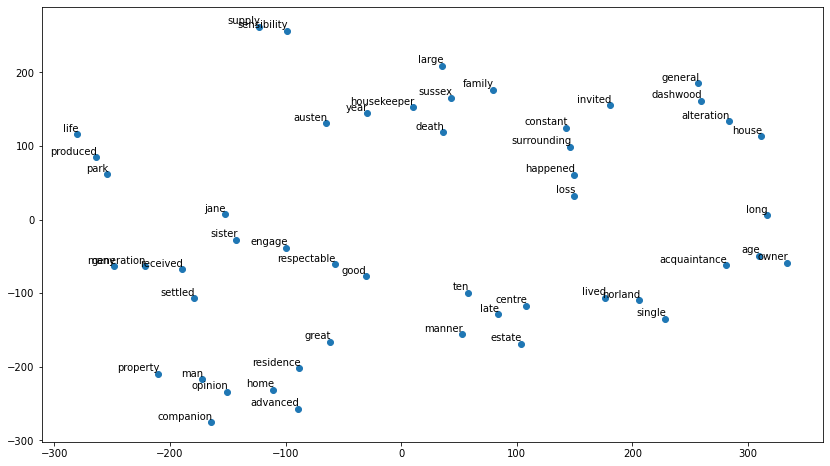

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50

T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')



**10. Resources used**

http://jalammar.github.io/illustrated-word2vec/
https://adventuresinmachinelearning.com/word2vec-tutorial-tensorflow/
https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa
https://adventuresinmachinelearning.com/word2vec-keras-tutorial/
https://www.tensorflow.org/tutorials/representation/word2vec#the_skip-gram_model
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py

